## in this notebook i train CNN model to classify images using FastAi librarery

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fastai  import  *
from fastai.vision import *

## i upload my data on my google drive

In [8]:
import os
path=os.chdir('/content/drive/MyDrive')

In [10]:
path=Path.cwd()

In [11]:
path

PosixPath('/content/drive/MyDrive')

In [12]:
path=path/'dataset'
path.ls()

[PosixPath('/content/drive/MyDrive/dataset/test_set'),
 PosixPath('/content/drive/MyDrive/dataset/training_set')]

In [13]:
data=ImageDataBunch.from_folder(path,train='.', valid_pct=0.2, ds_tfms=get_transforms(),size=224)

In [14]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (7999 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dogs,dogs,dogs,dogs,dogs
Path: /content/drive/MyDrive/dataset;

Valid: LabelList (1999 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cats,cats,dogs,cats,cats
Path: /content/drive/MyDrive/dataset;

Test: None

## Now we train CNN model
here i use resnet34 which means We’re going to use 34 layers of neural networks

In [15]:
learn=cnn_learner(data, models.resnet34, metrics=[accuracy,error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [16]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.137191,0.062830,0.982992,0.017009,16:55
1,0.084350,0.051092,0.981491,0.018509,02:15
2,0.053521,0.034429,0.985493,0.014507,02:15
3,0.034230,0.033000,0.986493,0.013507,02:16


## Now we draw a confusion matrix

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

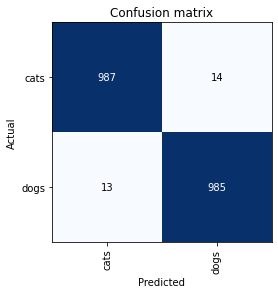

In [19]:
interp.plot_confusion_matrix()

## Now we use our model to classify test images 
here 0 means image belong to cat categroy  
and 1 means image belong to dog categroy

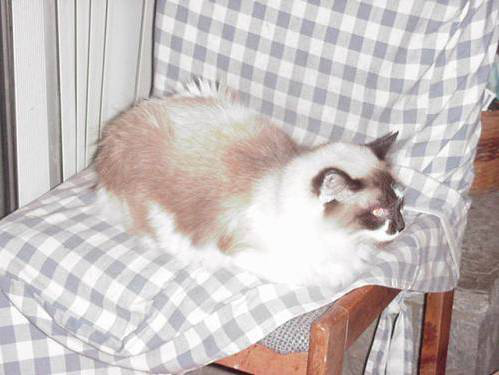

In [20]:
i=open_image('/content/drive/MyDrive/dataset/test_set/cats/cat.4011.jpg')
i

In [21]:
what,_,probs =learn.predict(i)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a cats!
Probability it's a cats: 0.000919


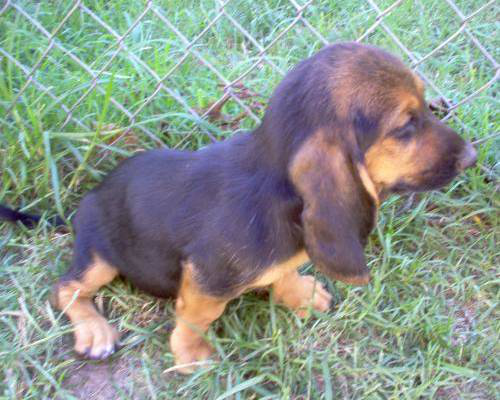

In [25]:
i=open_image('/content/drive/MyDrive/dataset/test_set/dogs/dog.4009.jpg')
i

In [26]:
what,_,probs =learn.predict(i)
print(f"It's a {what}!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a dogs!
Probability it's a dogs: 0.999999
